Importing libraries

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, auc, roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing data

In [17]:
data = pd.read_csv('synth_total.csv')

Splitting data on train and test sets

In [18]:
X = data[[
'age',
'satistifaction_finance',
'satisfaction_relationships',
'satisfaction_apartment',
'bc_self_distraction',
'bc_active_coping',
'bc_denial',
'bc_substance_use',
'bc_emotional_support',
'bc_behavioral_disengagement',
'bc_instrumental_support',
'bc_venting',
'bc_positive_reframing',
'bc_planning',
'bc_humor',
'bc_acceptance',
'bc_religion',
'bc_self_blame',
'gender_rec_Male',
'physical_activity_rec_change_Same',
'substance_change_Not more',
'eating_habits_rec_change_No change',
'nr_people_in_HH']]

y = data[['sidas_total_cat_0_High']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

Replacing missing values in one column of the training set

In [20]:
bc_instrumental_support_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train[['bc_instrumental_support']] = bc_instrumental_support_imputer.fit_transform(X_train[['bc_instrumental_support']])

Scaling the training set

Most of ML algorithms do not perform well when the attributes have very different scales, so we scale them. Min-max scaling, or normalization, means that we rescale all the attributes to be on the scale from 0 to 1.

In [21]:
mmscaler = MinMaxScaler()

X_train[['age_n','satistifaction_finance_n', 'satisfaction_relationships_n', 'satisfaction_apartment_n',
   'bc_self_distraction_n', 'bc_active_coping_n', 'bc_denial_n', 'bc_substance_use_n', 'bc_emotional_support_n', 'bc_behavioral_disengagement_n', 'bc_venting_n', 'bc_positive_reframing_n', 'bc_planning_n',
   'bc_humor_n', 'bc_acceptance_n', 'bc_religion_n', 'bc_instrumental_support_n', 'bc_self_blame_n', 'nr_people_in_HH_n'
   ]] = mmscaler.fit_transform(X_train[['age','satistifaction_finance', 'satisfaction_relationships', 'satisfaction_apartment', 
   'bc_self_distraction', 'bc_active_coping', 'bc_denial', 'bc_substance_use', 'bc_emotional_support',
    'bc_behavioral_disengagement', 'bc_venting', 'bc_positive_reframing', 'bc_planning',
    'bc_humor', 'bc_acceptance', 'bc_religion', 'bc_instrumental_support', 'bc_self_blame','nr_people_in_HH']])

X_train.drop(['age','satistifaction_finance', 'satisfaction_relationships', 'satisfaction_apartment', 
   'bc_self_distraction', 'bc_active_coping', 'bc_denial', 'bc_substance_use', 'bc_emotional_support',
    'bc_behavioral_disengagement', 'bc_venting', 'bc_positive_reframing', 'bc_planning',
    'bc_humor', 'bc_acceptance', 'bc_religion', 'bc_instrumental_support', 'bc_self_blame','nr_people_in_HH'], 
             axis=1, inplace=True)


Missing value imputation and scaling test set

In [22]:
X_test[['bc_instrumental_support']] = bc_instrumental_support_imputer.transform(X_test[['bc_instrumental_support']])

X_test[['age_n','satistifaction_finance_n', 'satisfaction_relationships_n', 'satisfaction_apartment_n',
   'bc_self_distraction_n', 'bc_active_coping_n', 'bc_denial_n', 'bc_substance_use_n', 'bc_emotional_support_n', 'bc_behavioral_disengagement_n', 'bc_venting_n', 'bc_positive_reframing_n', 'bc_planning_n',
   'bc_humor_n', 'bc_acceptance_n', 'bc_religion_n', 'bc_instrumental_support_n', 'bc_self_blame_n', 'nr_people_in_HH_n'
   ]] = mmscaler.transform(X_test[['age','satistifaction_finance', 'satisfaction_relationships', 'satisfaction_apartment', 
   'bc_self_distraction', 'bc_active_coping', 'bc_denial', 'bc_substance_use', 'bc_emotional_support',
    'bc_behavioral_disengagement', 'bc_venting', 'bc_positive_reframing', 'bc_planning',
    'bc_humor', 'bc_acceptance', 'bc_religion', 'bc_instrumental_support', 'bc_self_blame','nr_people_in_HH']])

X_test.drop(['age','satistifaction_finance', 'satisfaction_relationships', 'satisfaction_apartment', 
   'bc_self_distraction', 'bc_active_coping', 'bc_denial', 'bc_substance_use', 'bc_emotional_support',
    'bc_behavioral_disengagement', 'bc_venting', 'bc_positive_reframing', 'bc_planning',
    'bc_humor', 'bc_acceptance', 'bc_religion', 'bc_instrumental_support', 'bc_self_blame','nr_people_in_HH'], 
             axis=1, inplace=True)

Setting up the models

Logistic Regression: uses logistic function to maps any real-valued set of independent variables input into a value between 0 and 1.  

Random Forest: multiple decision trees are created using different random subsets of the data and features, so that each three can be different. Predictions are made by calculating the prediction for each decision tree, then taking the most popular result. 

Support vector machine: finds a hyperplane that best separates the two classes, by finding the maximum margin between the hyperplane and the closest observations - maximum distances between the two classes.



In [23]:
lr = LogisticRegression()

rf = RandomForestClassifier()

svm = SVC(random_state=99)

Hyperparameter tuning using grid search.

Hyperparameters are model parameters whose values are set before training. Hyperparameter tuning is a process of finding the right values of the hyperparameters to get the best results. In grid search, we organize hyperparameters into a grid and try every combination of values of this grid, calculating some performance metrics using cross-validation.

For LRG:
-solver - how parameters are found
-penalty - what kind of regularization is used: none, Lasso or Ridge
-C - strenght of the regularization

For RF:
-min_samples_leaf - minimum number of samples required to be at a leaf node
-max_depth - depth of each tree in the forest
-min_samples_split - minimum number of samples required to split an internal node

For SVM:
-kernel - function to define the separation plane
-C - size of the margin for missclassification

In [24]:
lr_param_grid = [{
                  'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                  'penalty': ['none', 'l1', 'l2'],
                  'C': [1.0, 0.5, 0.1]
                 }]

rf_param_grid = [{
                   'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                   'max_depth': [1, 2, 3, 4, 5, 6],
                   'min_samples_split': [2, 3, 4, 5, 6]}]


svm_param_grid = [{
                   'kernel': ['linear', 'rbf'], 
                   'C': [1, 2, 3, 4, 5, 6]}]



Performance metric: some metric that measures how our model performes. Some popular ones are: 

-accuracy (% accurately predicted)

-confusion matrix (number of TP, FP, TN, and FN)

-precision (% of TP among all predicted P) and recall/sensitivity (% of predicted P among all existing P)

-F1 score (harmonic mean of precision and recall)

-AUROC (Area under Receiver operating characteristics curve) - high ROC means that the probability of a randomly chosen positive example is really positive

K-fold cross-validation: training data is divided into k subsets. Each time, one of the k subsets is used as the validation set and the other k-1 subsets form a training set. The error estimation is averaged over all k trials.

In [25]:
lr_gs=GridSearchCV(lr, lr_param_grid, scoring='roc_auc', n_jobs=-1, cv=10)

rf_gs=GridSearchCV(rf, rf_param_grid, scoring='roc_auc', n_jobs=-1, cv=10)

svm_gs=GridSearchCV(svm, svm_param_grid, scoring='roc_auc', n_jobs=-1, cv=10)

Fitting the models

In [26]:
lr_gs.fit(X_train,y_train)
rf_gs.fit(X_train,y_train)
svm_gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=99), n_jobs=-1,
             param_grid=[{'C': [1, 2, 3, 4, 5, 6],
                          'kernel': ['linear', 'rbf']}],
             scoring='roc_auc')

Assessing models' performance

In [27]:
print('{} AuC: {}'.format("Log. Regression",
lr_gs.score(X_test,y_test)))
print('{} Best Params: {}'.format("Log. Regression;", lr_gs.best_params_))
preds_lr=lr_gs.predict(X_test)
print(confusion_matrix(y_test, preds_lr))

print('{} AuC: {}'.format("RF",
rf_gs.score(X_test,y_test)))
print('{} Best Params: {}'.format("RF;", rf_gs.best_params_))
preds_rf=rf_gs.predict(X_test)
print(confusion_matrix(y_test, preds_rf))

print('{} AuC: {}'.format("SVM",
svm_gs.score(X_test,y_test)))
print('{} Best Params: {}'.format("SVM;", svm_gs.best_params_))
preds_svm=svm_gs.predict(X_test)
print(confusion_matrix(y_test, preds_svm))
 

Log. Regression AuC: 0.968381718884737
Log. Regression; Best Params: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
[[482   8]
 [  7  64]]
RF AuC: 0.9876976142569704
RF; Best Params: {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
[[485   5]
 [  5  66]]
SVM AuC: 0.9795918367346939
SVM; Best Params: {'C': 5, 'kernel': 'rbf'}
[[483   7]
 [ 13  58]]


Printing out the coefficients

In [28]:
features = X_train.columns
for i in sorted(zip(features, lr_gs.best_estimator_.coef_[0]), key=lambda x:-abs(x[-1])):
    print(i)

('bc_self_blame_n', 13.048999201161514)
('bc_acceptance_n', -1.973441100160334)
('bc_instrumental_support_n', -1.8633005050242644)
('substance_change_Not more', -1.6011621860626195)
('bc_planning_n', -0.9136950939964246)
('bc_substance_use_n', -0.7793793587506895)
('bc_religion_n', -0.5824691560366408)
('satisfaction_relationships_n', 0.32830001944642634)
('bc_venting_n', 0.1965989007053192)
('bc_behavioral_disengagement_n', -0.15441276675188936)
('age_n', 0.04653732012040938)
('bc_humor_n', -0.021889964255863665)
('gender_rec_Male', 0.0)
('physical_activity_rec_change_Same', 0.0)
('eating_habits_rec_change_No change', 0.0)
('satistifaction_finance_n', 0.0)
('satisfaction_apartment_n', 0.0)
('bc_self_distraction_n', 0.0)
('bc_active_coping_n', 0.0)
('bc_denial_n', 0.0)
('bc_emotional_support_n', 0.0)
('bc_positive_reframing_n', 0.0)
('nr_people_in_HH_n', 0.0)


In [29]:
lr_gs.best_estimator_.intercept_

array([-7.64886563])

Plotting the ROC curve

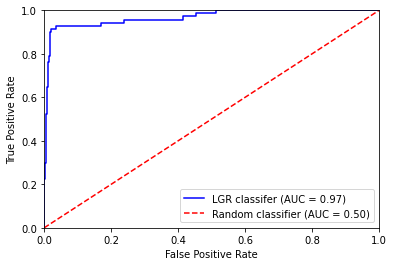

In [35]:
probs_lr = lr_gs.predict_proba(X_test)
preds_lr = probs_lr[:,1]
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, preds_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

roc_curve(y_test, preds_lr)
#plt.title('Logistic Regression: Receiver Operating Characteristic')
plot1 = plt.plot(fpr_lr, tpr_lr, 'b', label = 'LGR classifer (AUC = %0.2f)' % roc_auc_lr)
plt.legend(loc = 'lower right')
plot2 = plt.plot([0, 1], [0, 1],'r--', label = 'Random classifier (AUC = 0.50)')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

<AxesSubplot:>

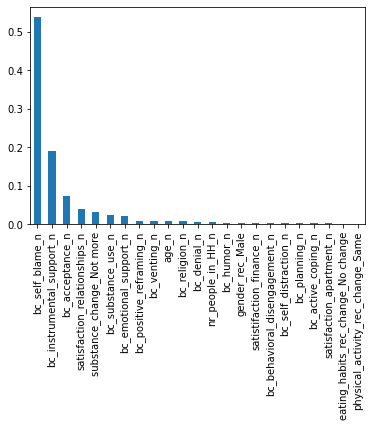

In [36]:
feature_importances = pd.Series(rf_gs.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_importances.plot.bar()